# Fisher Score-Chisquare Test For Feature Selection

Compute chi-squared stats between each non-negative feature and class or target.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative integer feature values such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

If some of your features are continuous, you need to categories them, for example by using KBinsDiscretizer.

Chi-square test checks whether two variables are related (dependent) or not related (independent).

In feature selection, we want to keep features that are related to the target (Y).

If a feature has no connection to the target (i.e., it is independent), then it is not helpful for predicting.

So the chi-square test helps remove ("weed out") such useless features.

The chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature,against the expected distribution of the target classes ,regardless of the feature categories.

In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#[sex,embarked,alone,pclass,Survived ]-last one is dependent target class and other are categorical feature and we need to compare all the categories to the target class

df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [ ]:
#Step1 For doing chisquare test first of all do the label encoding technique in each  feature

#apply label encoding on sex column

import numpy as np
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [ ]:
#apply label encoding on embarked column-In this column has multiple category and in order to much more generic write simple code

ordinal_label={k: i for i,k in enumerate(df['embarked'].unique(),0)}

ordinal_label


#df['embarked'].unique()
# This gets all the unique values from the 'embarked' column of the DataFrame df.
#enumerate(..., 0)
#enumerate(iterable, start=0) returns pairs of (index, value) starting from 0.

# Dictionary comprehension: {k: i for i, k in ...}
#This builds a dictionary where:

#keys = unique values from embarked ('S', 'C', 'Q')

#values = integer labels (0, 1, 2)





{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [ ]:
df['embarked']=df['embarked'].map(ordinal_label)
#This replaces each value in the 'embarked' column based on the dictionary ordinal_label.
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [ ]:
#label encoding on alone coloumn
df['alone']=np.where(df['alone']==True,1,0)

In [ ]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [ ]:
X=df.drop('survived',axis=1)
y=df['survived']
X.head()

,sex,embarked,alone,pclass
0,1,0,0,3
1,0,1,0,1
2,0,0,1,3
3,0,0,0,1
4,1,0,1,3


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,sex,embarked,alone,pclass
331,1,0,1,1
733,1,0,1,2
382,1,0,1,3
704,1,0,0,3
813,0,0,0,3


In [ ]:
X_train.isnull().sum()#checking null value or not

,0
sex,0
embarked,0
alone,0
pclass,0


In [ ]:
#perform chisquare test
##chi square returns two values Fscore and P value
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)


In [ ]:
f_p_values

(array([71.90588207,  9.39148824,  9.22453348, 21.47886255]),
 array([2.25710127e-17, 2.17995171e-03, 2.38793531e-03, 3.57750429e-06]))

1st array value is the F score and 2nd array is the P values .the f score needs to be higher the more higher the value of F score the more important the feature is .and the lesser the P value more important the feature is.

In [ ]:
import pandas as pd
p_values_series=pd.Series(f_p_values[1])
p_values_series.index=X_train.columns
p_values_series

,0
sex,2.257101e-17
embarked,2.179952e-03
alone,2.387935e-03
pclass,3.577504e-06


In [ ]:
pvalues_sort=p_values_series.sort_index(ascending=True)#smaller to bigger sorted
pvalues_sort

,0
alone,2.387935e-03
embarked,2.179952e-03
pclass,3.577504e-06
sex,2.257101e-17


smaller  p value is alone
and this is the most important column when compare to the output feature survived

<BarContainer object of 4 artists>

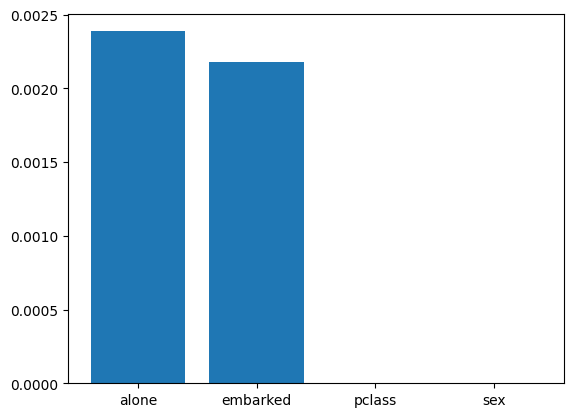

In [ ]:
import matplotlib.pyplot as plt

plt.bar(pvalues_sort.index,pvalues_sort)